In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def visualize_training_subplots(csv_file_path):
    try:
        df = pd.read_csv(csv_file_path)
    except FileNotFoundError:
        print(f"GRESKA: Fajl nije pronađen na putanji: {csv_file_path}")
        return
    except Exception as e:
        print(f"GRESKA pri učitavanju fajla: {e}")
        return

    required_cols = ['epoch', 'train_loss', 'train_accuracy', 'train_f1', 'val_accuracy', 'val_f1']
    if not all(col in df.columns for col in required_cols):
        print("GRESKA: CSV fajl ne sadrži sve potrebne kolone.")
        return

    epochs = df['epoch']
    
    max_epoch = epochs.max()
    tick_positions = np.arange(1, max_epoch + 1, 5)
    if max_epoch not in tick_positions:
        tick_positions = np.append(tick_positions, max_epoch)
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  
    plt.style.use('seaborn-v0_8-whitegrid')
    
    ax1 = axes[0]
    ax1.plot(epochs, df['train_loss'], label='Trening gubitak', color='indigo', linewidth=2)
    
    ax1.set_title('A) Tok Trening gubitka', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Epoha', fontsize=10)
    ax1.set_ylabel('Gubitak', fontsize=10)
    ax1.legend(loc='upper right', fontsize=9)
    ax1.grid(True, linestyle='--', alpha=0.6)
    ax1.set_xticks(tick_positions)
    
    ax2 = axes[1]
    ax2.plot(epochs, df['train_accuracy'], label='Trening tačnost', color='darkorange', linewidth=2, marker='o', markersize=4)
    ax2.plot(epochs, df['val_accuracy'], label='Validaciona tačnost', color='darkred', linestyle='--', linewidth=2, marker='o', markersize=4)
    
    ax2.set_title('B) Tok Tačnosti', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Epoha', fontsize=10)
    ax2.set_ylabel('Tačnost', fontsize=10)
    ax2.legend(loc='lower right', fontsize=9)
    ax2.grid(True, linestyle='--', alpha=0.6)
    ax2.set_ylim(0, 1.05) 
    ax2.set_xticks(tick_positions)
    
    ax3 = axes[2]
    ax3.plot(epochs, df['train_f1'], label='Trening F1-Score', color='mediumseagreen', linewidth=2, marker='s', markersize=4)
    ax3.plot(epochs, df['val_f1'], label='Validacioni F1-Score', color='navy', linestyle='--', linewidth=2, marker='s', markersize=4)
    
    ax3.set_title('C) Tok F1-Score metrike', fontsize=12, fontweight='bold')
    ax3.set_xlabel('Epoha', fontsize=10)
    ax3.set_ylabel('F1-Score', fontsize=10)
    ax3.legend(loc='lower right', fontsize=9)
    ax3.grid(True, linestyle='--', alpha=0.6)
    ax3.set_ylim(0, 1.05) 
    ax3.set_xticks(tick_positions)
    
    plt.tight_layout() 
    plt.show()

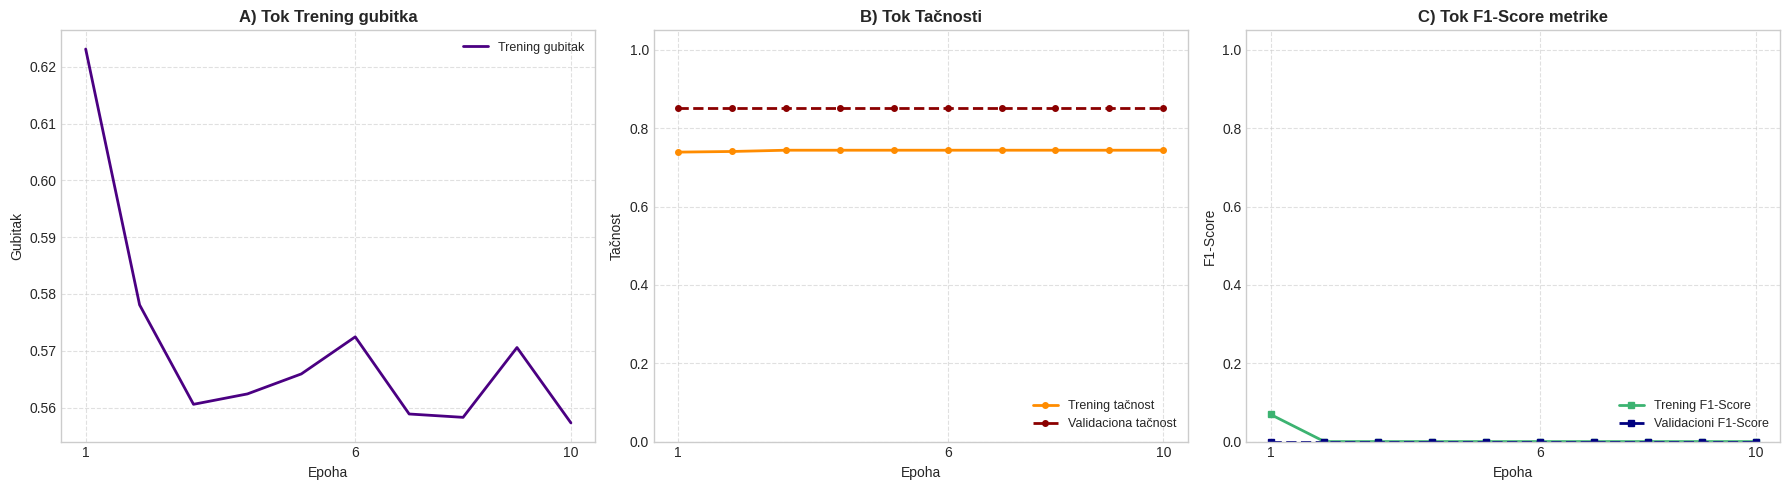

In [15]:
visualize_training_subplots('/home/ivana-milutinovic/Documents/Doktorske/Prva godina/Seminar1/gitRepo/phd_seminar-paper1/training/mobileNet/results/mobilenet_v3_large_ssl_finetuned_new_without_CW_training_log.csv')